In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import seaborn as sns
import numpy as np
import re
import datetime
from datetime import datetime
import pycountry_convert as pc
import warnings
warnings.filterwarnings("ignore")

In [2]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

def country_code_to_continent(country_code):
    country_continent_code = pc.country_alpha2_to_continent_code(country_code)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [3]:
df = pd.read_csv("OxCGRT_nat_latest.csv", encoding = "utf-8")
data = df.copy()

In [4]:
data.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex,EconomicSupportIndex_ForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data["Date"] = pd.to_datetime(data["Date"].astype("str"))

In [6]:
exception_col = ["Kosovo", "Timor-Leste"]
data["RegionName"] = data["CountryName"][~data["CountryName"].isin(exception_col)].drop_duplicates(keep = "first").apply(country_to_continent)
data["RegionName"][data["CountryName"] == "Kosovo"] = "Europe"
data["RegionName"][data["CountryName"] == "Timor-Leste"] = "Asia"
data["RegionName"].fillna(method = "ffill", axis = 0, inplace = True)
data["RegionName"].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [7]:
data[data.columns[6:21]] = data[data.columns[6:21]].fillna(method = "ffill", axis = 0)
data[data.columns[6:21]] = data[data.columns[6:21]].fillna(method = "ffill", axis = 1)
data[data.columns[6:21]]

,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,C3M_Cancel public events,C3M_Flag,C4M_Restrictions on gatherings,C4M_Flag,C5M_Close public transport,C5M_Flag,C6M_Stay at home requirements,C6M_Flag,C7M_Restrictions on internal movement,C7M_Flag,C8EV_International travel controls
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188304,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
188305,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
188306,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
188307,1.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0


In [8]:
columns = data.columns[6:21]
valued_col = []
binary_col = []

p = re.compile(r'\w+[Flag]$')
for colum in columns:
    if p.match(colum):
        binary_col.append(colum)
    else:
        valued_col.append(colum)
print(f"binary_col:{binary_col}\nValue_col: {valued_col}")

binary_col:['C1M_Flag', 'C2M_Flag', 'C3M_Flag', 'C4M_Flag', 'C5M_Flag', 'C6M_Flag', 'C7M_Flag']
Value_col: ['C1M_School closing', 'C2M_Workplace closing', 'C3M_Cancel public events', 'C4M_Restrictions on gatherings', 'C5M_Close public transport', 'C6M_Stay at home requirements', 'C7M_Restrictions on internal movement', 'C8EV_International travel controls']


In [9]:
value_data = data[valued_col]
binary_data = (data[binary_col] > 0).astype(int)
whole_data = data[data.columns[6:21]]
df_value = pd.concat([data[data.columns[:6]], value_data], axis = 1)
df_binary = pd.concat([data[data.columns[:6]], binary_data], axis = 1)
df_binary.columns = df_value.columns[:-1]
df = pd.concat([data[data.columns[:6]], value_data, binary_data], axis = 1)

In [11]:
df.to_csv("World_restriction_whole.csv", encoding = "utf-8", index = False)
df

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C2M_Workplace closing,C3M_Cancel public events,C4M_Restrictions on gatherings,...,C6M_Stay at home requirements,C7M_Restrictions on internal movement,C8EV_International travel controls,C1M_Flag,C2M_Flag,C3M_Flag,C4M_Flag,C5M_Flag,C6M_Flag,C7M_Flag
0,Aruba,ABW,North America,NaN,NAT_TOTAL,2020-01-01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,Aruba,ABW,North America,NaN,NAT_TOTAL,2020-01-02,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,Aruba,ABW,North America,NaN,NAT_TOTAL,2020-01-03,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,Aruba,ABW,North America,NaN,NAT_TOTAL,2020-01-04,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,Aruba,ABW,North America,NaN,NAT_TOTAL,2020-01-05,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188304,Zimbabwe,ZWE,Africa,NaN,NAT_TOTAL,2022-09-29,1.0,1.0,1.0,3.0,...,2.0,1.0,1.0,1,1,1,1,1,1,1
188305,Zimbabwe,ZWE,Africa,NaN,NAT_TOTAL,2022-09-30,1.0,1.0,1.0,3.0,...,2.0,1.0,1.0,1,1,1,1,1,1,1
188306,Zimbabwe,ZWE,Africa,NaN,NAT_TOTAL,2022-10-01,1.0,1.0,1.0,3.0,...,2.0,1.0,1.0,1,1,1,1,1,1,1
188307,Zimbabwe,ZWE,Africa,NaN,NAT_TOTAL,2022-10-02,1.0,0.0,1.0,3.0,...,2.0,1.0,1.0,1,1,1,1,1,1,1


In [73]:
df_value

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C2M_Workplace closing,C3M_Cancel public events,C4M_Restrictions on gatherings,C5M_Close public transport,C6M_Stay at home requirements,C7M_Restrictions on internal movement,C8EV_International travel controls
0,Aruba,ABW,North America,NaN,NAT_TOTAL,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,North America,NaN,NAT_TOTAL,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,North America,NaN,NAT_TOTAL,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,North America,NaN,NAT_TOTAL,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,North America,NaN,NAT_TOTAL,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188304,Zimbabwe,ZWE,Africa,NaN,NAT_TOTAL,2022-09-29,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0
188305,Zimbabwe,ZWE,Africa,NaN,NAT_TOTAL,2022-09-30,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0
188306,Zimbabwe,ZWE,Africa,NaN,NAT_TOTAL,2022-10-01,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0
188307,Zimbabwe,ZWE,Africa,NaN,NAT_TOTAL,2022-10-02,1.0,0.0,1.0,3.0,1.0,2.0,1.0,1.0


In [66]:
df_binary

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C2M_Workplace closing,C3M_Cancel public events,C4M_Restrictions on gatherings,C5M_Close public transport,C6M_Stay at home requirements,C7M_Restrictions on internal movement
0,Aruba,ABW,North America,NaN,NAT_TOTAL,2020-01-01,0,0,0,0,0,0,0
1,Aruba,ABW,North America,NaN,NAT_TOTAL,2020-01-02,0,0,0,0,0,0,0
2,Aruba,ABW,North America,NaN,NAT_TOTAL,2020-01-03,0,0,0,0,0,0,0
3,Aruba,ABW,North America,NaN,NAT_TOTAL,2020-01-04,0,0,0,0,0,0,0
4,Aruba,ABW,North America,NaN,NAT_TOTAL,2020-01-05,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188304,Zimbabwe,ZWE,Africa,NaN,NAT_TOTAL,2022-09-29,1,1,1,1,1,1,1
188305,Zimbabwe,ZWE,Africa,NaN,NAT_TOTAL,2022-09-30,1,1,1,1,1,1,1
188306,Zimbabwe,ZWE,Africa,NaN,NAT_TOTAL,2022-10-01,1,1,1,1,1,1,1
188307,Zimbabwe,ZWE,Africa,NaN,NAT_TOTAL,2022-10-02,1,1,1,1,1,1,1


In [10]:
df_binary_group = df_binary[df_binary.columns[6:]].groupby(df_binary["Date"]).sum()
df_binary_group.columns = [re.sub(r'C\dM_', 'bin_', colum) for colum in df_binary_group.columns]
df_binary_group

,bin_School closing,bin_Workplace closing,bin_Cancel public events,bin_Restrictions on gatherings,bin_Close public transport,bin_Stay at home requirements,bin_Restrictions on internal movement
Date,,,,,,,
2020-01-01,159,170,165,157,152,137,125
2020-01-02,159,170,165,157,152,137,125
2020-01-03,159,170,165,157,152,137,125
2020-01-04,159,170,165,157,152,137,125
2020-01-05,159,170,165,157,152,137,125
...,...,...,...,...,...,...,...
2022-09-29,160,171,166,158,153,138,126
2022-09-30,160,171,166,158,153,138,126
2022-10-01,160,171,166,158,153,138,126


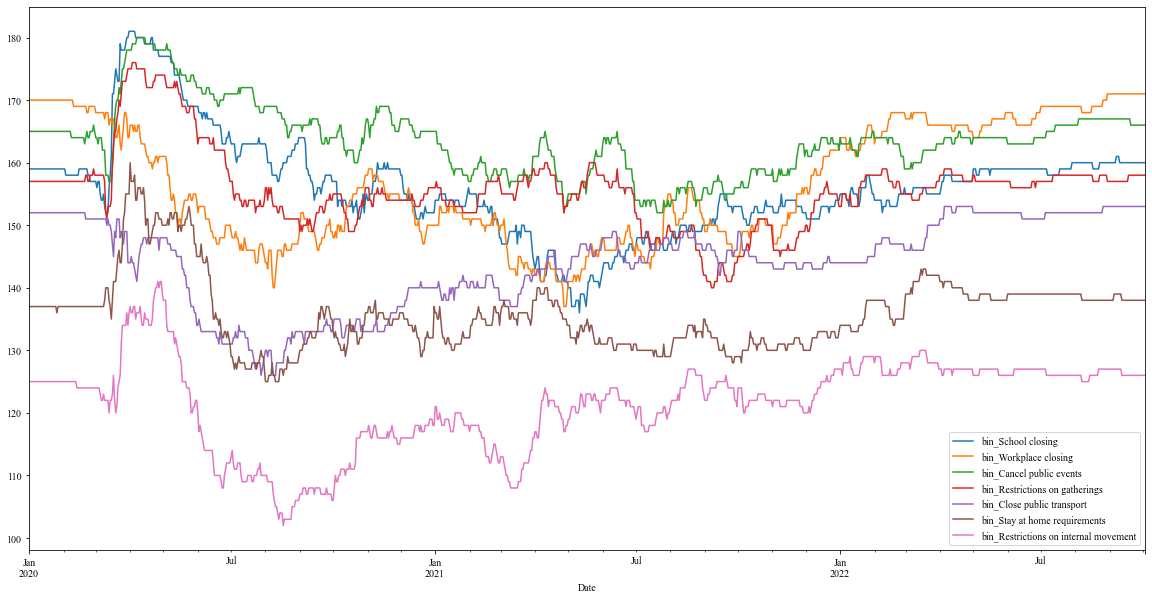

In [11]:
df_binary_group.plot(figsize = (20,10));

In [69]:
df_binary_group_con = df_binary.groupby(["Date", "RegionName"])[df_binary.columns[6:]].sum()
df_binary_group_con.columns = [re.sub(r'C\dM_', 'bin_', colum) for colum in df_binary_group_con.columns]
df_binary_group_con

bin_School closing  bin_Workplace closing  \
Date       RegionName                                                 
2020-01-01 Africa                         44                     45   
           Asia                           40                     42   
           Europe                         37                     42   
           North America                  20                     22   
           Oceania                         7                      7   
...                                      ...                    ...   
2022-10-03 Asia                           42                     40   
           Europe                         38                     42   
           North America                  20                     21   
           Oceania                         5                      7   
           South America                   9                     11   

                          bin_Cancel public events  \
Date       RegionName                                
2020-01-01 Africa                               47   
           Asia                                 40   
           Europe                               40   
           North America                        20   
           Oceania                               7   
...                                            ...   
2022-10-03 Asia                                 41   
           Europe                               39   
           North America                        21   
           Oceania                               6   
           South America                         9   

                          bin_Restrictions on gatherings  \
Date       RegionName                                      
2020-01-01 Africa                                     42   
           Asia                                       39   
           Europe                                     38   
           North America                              21   
           Oceania                                     6   
...                                                  ...   
2022-10-03 Asia                                       37   
           Europe                                     39   
           North America                              19   
           Oceania                                     4   
           South America                               9   

                          bin_Close public transport  \
Date       RegionName                                  
2020-01-01 Africa                                 41   
           Asia                                   39   
           Europe                                 35   
           North America                          20   
           Oceania                                 8   
...                                              ...   
2022-10-03 Asia                                   38   
           Europe                                 37   
           North America                          19   
           Oceania                                 3   
           South America                           9   

                          bin_Stay at home requirements  \
Date       RegionName                                     
2020-01-01 Africa                                    35   
           Asia                                      34   
           Europe                                    38   
           North America                             19   
           Oceania                                    5   
...                                                 ...   
2022-10-03 Asia                                      26   
           Europe                                    37   
           North America                             19   
           Oceania                                    5   
           South America                              9   

                          bin_Restrictions on internal movement  
Date       RegionName                                  

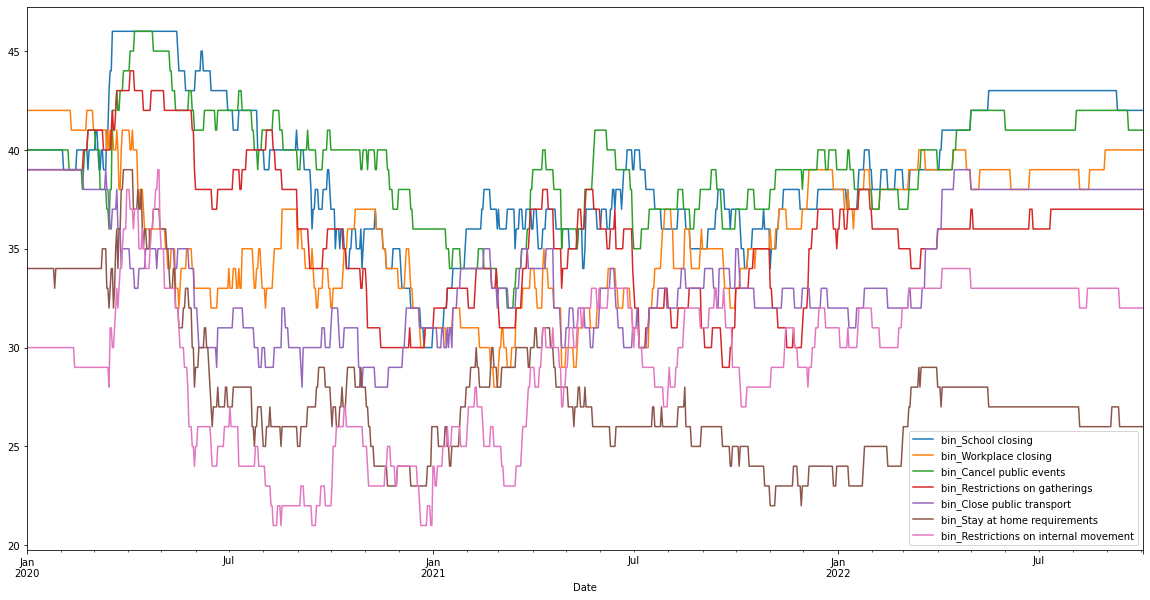

In [70]:
df_binary_group_con.xs(key = "Asia", level = 1).plot(figsize = (20,10));

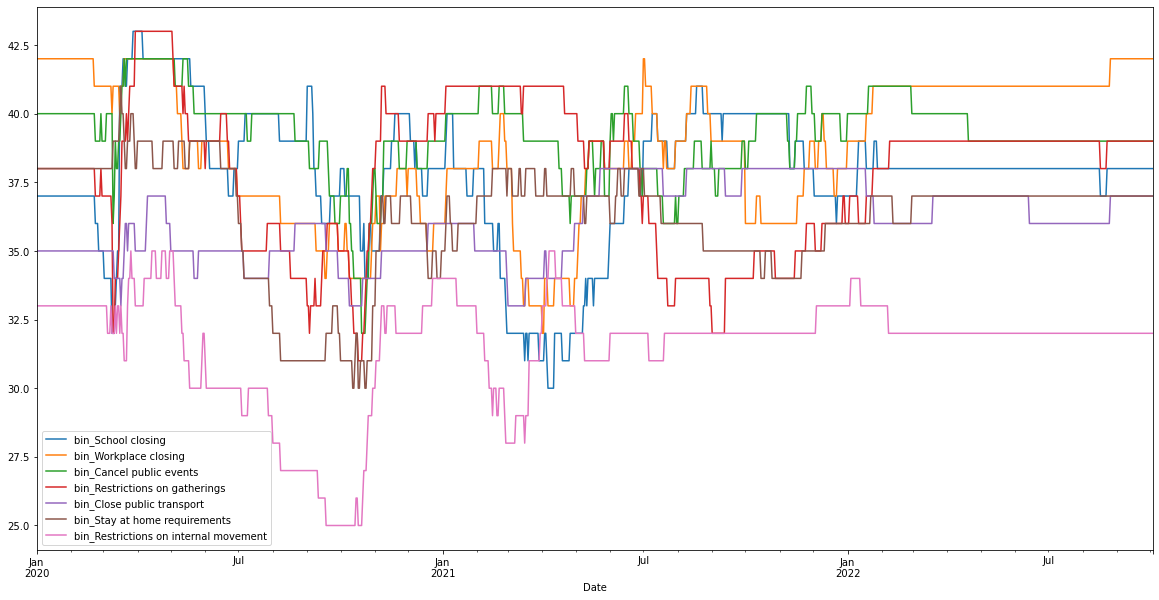

In [71]:
df_binary_group_con.xs(key = "Europe", level = 1).plot(figsize = (20,10));

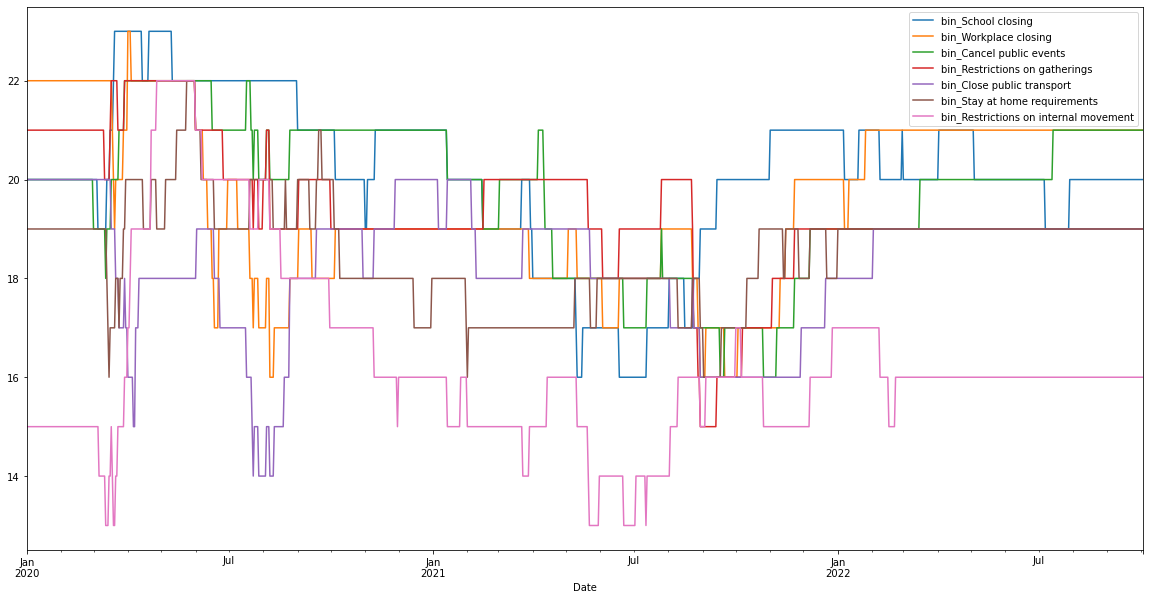

In [78]:
df_binary_group_con.xs(key = "North America", level = 1).plot(figsize = (20,10));

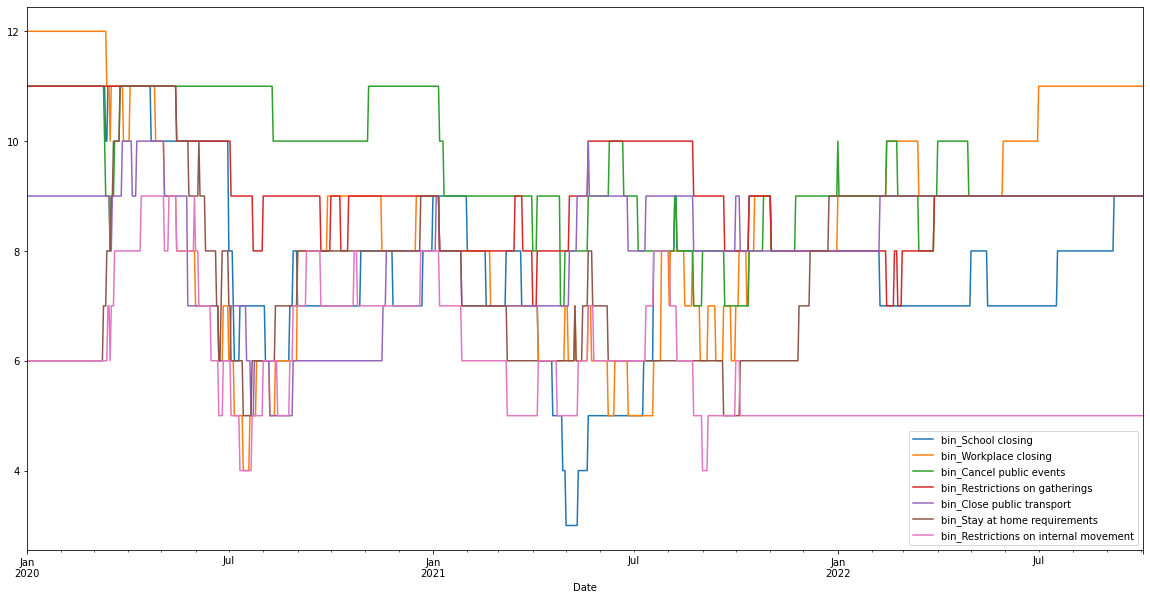

In [79]:
df_binary_group_con.xs(key = "South America", level = 1).plot(figsize = (20,10));

In [13]:
df_value_group = df_value[df_value.columns[6:]].groupby(df_value["Date"]).mean()
df_value_group.columns = [re.sub(r'C\dM_', '', colum) for colum in df_value_group.columns]
df_value_group.rename(columns = {'C8EV_International travel controls':"International travel controls"}, inplace = True) 
df_value_group

,School closing,Workplace closing,Cancel public events,Restrictions on gatherings,Close public transport,Stay at home requirements,Restrictions on internal movement,International travel controls
Date,,,,,,,,
2020-01-01,0.010695,0.005348,0.000000,0.010695,0.000000,0.000000,0.000000,0.016043
2020-01-02,0.010695,0.005348,0.000000,0.010695,0.000000,0.000000,0.000000,0.021390
2020-01-03,0.010695,0.005348,0.000000,0.010695,0.000000,0.000000,0.000000,0.021390
2020-01-04,0.010695,0.005348,0.000000,0.010695,0.000000,0.000000,0.000000,0.021390
2020-01-05,0.010695,0.005348,0.000000,0.010695,0.000000,0.000000,0.000000,0.021390
...,...,...,...,...,...,...,...,...
2022-09-29,0.347594,0.486631,0.427807,0.566845,0.165775,0.139037,0.176471,0.673797
2022-09-30,0.347594,0.486631,0.427807,0.566845,0.165775,0.139037,0.176471,0.673797
2022-10-01,0.347594,0.486631,0.427807,0.566845,0.165775,0.139037,0.176471,0.668449


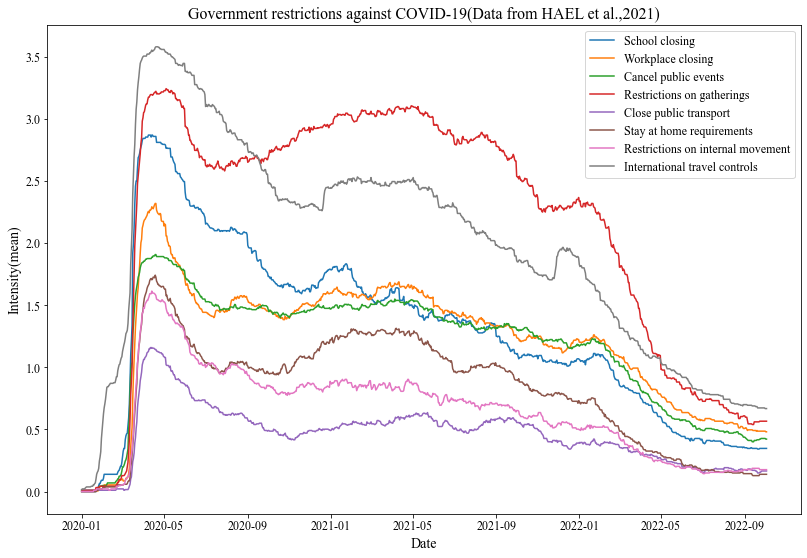

In [16]:
fig = plt.figure(figsize = (13.5, 9))
plt.plot(df_value_group);
plt.title("Government restrictions against COVID-19(Data from HAEL et al.,2021)", fontsize = 16)
plt.legend(df_value_group.columns, fontsize = 12)
plt.xlabel("Date", fontsize = 14)
plt.xticks(fontsize= 12)
plt.ylabel("Intensity(mean)", fontsize = 14);
plt.yticks(fontsize= 12)
plt.savefig('foo.png', bbox_inches='tight')

In [84]:
df_value_group.to_csv("World_restriction.csv", index = True, encoding = 'utf-8')
df_binary_group.to_csv("World_restricion_bin.csv", index = True, encoding = 'utf-8')

In [3]:
df_value_group = pd.read_csv("World_restriction.csv", encoding = 'utf-8')

In [91]:
df["Quarter"] = df["Date"].dt.to_period("Q")
df_quarter = df.drop_duplicates(["Quarter", "CountryName"], keep = "first", ignore_index = True)
df_quarter = df_quarter.groupby(["CountryName", "CountryCode", "Quarter"])[valued_col].mean()
df_quarter.columns = [re.sub(r'C\dM_', '', colum) for colum in df_quarter.columns]
df_quarter.rename(columns = {'C8EV_International travel controls':"International travel controls"}, inplace = True)
df_quarter

School closing  Workplace closing  \
CountryName CountryCode Quarter                                      
Afghanistan AFG         2020Q1              0.0                0.0   
                        2020Q2              3.0                3.0   
                        2020Q3              3.0                3.0   
                        2020Q4              2.0                2.0   
                        2021Q1              1.0                0.0   
...                                         ...                ...   
Zimbabwe    ZWE         2021Q4              1.0                1.0   
                        2022Q1              0.0                1.0   
                        2022Q2              2.0                1.0   
                        2022Q3              1.0                1.0   
                        2022Q4              1.0                1.0   

                                 Cancel public events  \
CountryName CountryCode Quarter                         
Afghanistan AFG         2020Q1                    0.0   
                        2020Q2                    2.0   
                        2020Q3                    2.0   
                        2020Q4                    0.0   
                        2021Q1                    0.0   
...                                               ...   
Zimbabwe    ZWE         2021Q4                    1.0   
                        2022Q1                    1.0   
                        2022Q2                    1.0   
                        2022Q3                    1.0   
                        2022Q4                    1.0   

                                 Restrictions on gatherings  \
CountryName CountryCode Quarter                               
Afghanistan AFG         2020Q1                          0.0   
                        2020Q2                          0.0   
                        2020Q3                          4.0   
                        2020Q4                          0.0   
                        2021Q1                          0.0   
...                                                     ...   
Zimbabwe    ZWE         2021Q4                          3.0   
                        2022Q1                          3.0   
                        2022Q2                          3.0   
                        2022Q3                          3.0   
                        2022Q4                          3.0   

                                 Close public transport  \
CountryName CountryCode Quarter                           
Afghanistan AFG         2020Q1                      0.0   
                        2020Q2                      2.0   
                        2020Q3                      2.0   
                        2020Q4                      0.0   
                        2021Q1                      0.0   
...                                                 ...   
Zimbabwe    ZWE         2021Q4                      1.0   
                        2022Q1                      1.0   
                        2022Q2                      1.0   
                        2022Q3                      1.0   
                        2022Q4                      1.0   

                                 Stay at home requirements  \
CountryName CountryCode Quarter                              
Afghanistan AFG         2020Q1                         0.0   
                        2020Q2                         2.0   
                        2020Q3                         2.0   
                        2020Q4                         0.0   
                        2021Q1                         0.0   
...                                                    ...   
Zimbabwe    ZWE         2021Q4                         1.0   
                        2022Q1                         2.0   
                        2022Q2                         2.0   
                        2022Q3                         2.0   
                        2022Q4                  

In [118]:
df_quarter.to_csv("World_restriction_whole.csv", encoding = 'utf-8')